# Projet ML Souleymane Mbaye

In [57]:
import sys
sys.path.append('./')
from src import Loss,Modules
import matplotlib.pyplot as plt
%matplotlib inline  


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. Test du Module Linear avec MSELoss sur la classification de chiffres 1 vs 2

In [58]:
import numpy as np
import pickle as pkl

data = pkl.load(open('data/usps.pkl', 'rb'))
X = np.array(data['X_train'], dtype=float) # conversion de type pour une meilleure compatibilité
Y = np.array(data['Y_train'], dtype=float)

where = np.where((Y>0) & (Y<=2))[0]
X12 = X[where]
Y12 = Y[where]
Y12[Y12==1] = 0
Y12[Y12==2] = 1

In [59]:
X_test = np.array(data['X_test'], dtype=float)
Y_test = np.array(data['Y_test'], dtype=float)

where = np.where((Y_test>0) & (Y_test<=2))[0]
X12_test = X_test[where]
Y12_test = Y_test[where]

Y12_test[Y12_test==1] = 0
Y12_test[Y12_test==2] = 1

In [60]:
# Y12 = Y12.reshape(-1,1)
# Y12_test = Y12_test.reshape(-1,1)
# print(X12.shape,Y12.shape)

In [61]:
model_lin_1 = Modules.Linear(256,16)

model_tanh = Modules.TanH()

model_lin_2 = Modules.Linear(16,1)

model_sig = Modules.Sigmoid()

loss_fn = Loss.MSELoss()

reseau_seq = Modules.Sequentiel((model_lin_1,
                                 model_tanh,
                                 model_lin_2,
                                 model_sig))

optim = Modules.Optim(reseau_seq,loss_fn,)

In [62]:
l_train_loss = Modules.SGD(reseau_seq,loss_fn,(X12,Y12),batch_size=5,epochs=2*50,lr=1e-3)
pred_test = Modules.prediction(X12_test,reseau_seq)
pred_train = Modules.prediction(X12,reseau_seq)

correct_test = (pred_test == Y12_test).sum() / len(Y12_test)
correct_train = (pred_train == Y12).sum() / len(Y12)

print(f"Accuracy train: \n {(100*correct_train):>0.1f}")
print(f"Accuracy test: \n {(100*correct_test):>0.1f}")

# Accuracy train: 
#  99.7
# Accuracy test: 
#  99.7

Accuracy train: 
 99.7
Accuracy test: 
 99.7


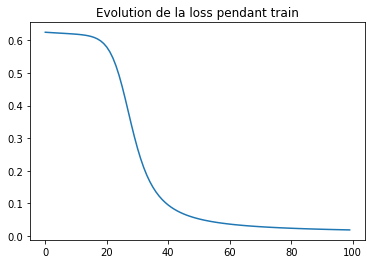

In [63]:
plt.figure()
plt.plot(np.arange(len(l_train_loss)),l_train_loss)
plt.title("Evolution de la loss pendant train")
plt.show()